# Practical Application III: Comparing Classifiers

---



**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The papaer describes an implementation of a DM project based on the **CRISP-DM methodology**. The business goal
is to find a model that can explain success of a contact, i.e. if the client subscribes the deposit.
To access the classifier performance, classification metrics, **Accuracy rate or ROC curve** is used in the paper.

The rate of successes for Male and Female is almost the same, so the Sex is not a considerable factor.
![](https://imgur.com/bWlHoca.png)

The AUC plots the False Positive Rate (FPR) versus the True Positive Rate (TPR) and allows identifying how good is the class discrimination: the higher the better, with the ideal model having a value of 1.0.


![](https://imgur.com/ebY1cOb.png)

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
!pip install --upgrade category_encoders --quiet
!pip install --upgrade feature_engine --quiet
!pip install --upgrade seaborn --quiet
# !pip uninstall scikit-learn # until no more scikit-learn is present
!pip install scikit-learn

In [2]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep = ';') # Load the dataset

In [4]:
df.head() # View  the data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The Business objective is to The data is predict if the client will subscribe a term deposit for a data related with direct marketing campaigns (phone calls) of a Portuguese banking institution using classification models namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are no missing values.

In [6]:
df.describe() # check the numerical fields in the dataset

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


We see that minimum `age` in the dataset is `17` and maximum `age` is `98`. `4918` is the maximum duration (1.36 hr). There wre a minium `1` campaign and a maximum of `56` campaings performed. There were a maximum of `7` previous contacts made before this campaign and for this client.


From the paper, it is clear that the social and economic context attributes do not have much impact in determining if they would subscribe for a term deposit. Hence, deleting those columns.

In [7]:
# Remove the fields that has not much impact for the problem statement under discussion
df = df.drop(columns = ['emp.var.rate',	'cons.price.idx',	'cons.conf.idx',	'euribor3m',	'nr.employed'])
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
#Check for duplicates
df.duplicated().sum()

13

There are 12 duplicates records in the datatset.


In [9]:
df = df.drop_duplicates() # drop the duplicate rows

In [10]:
#Finding unique values
unq_job = df['job'].nunique()
print(f"\n Unique values for 'job' {df['job'].unique()}")
unq_marital = df['marital'].nunique()
print(f"\n Unique values for 'marital status' {df['marital'].unique()}")
unq_edu = df['education'].nunique()
print(f"\n Unique values for 'education' {df['education'].unique()}")


 Unique values for 'job' ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

 Unique values for 'marital status' ['married' 'single' 'divorced' 'unknown']

 Unique values for 'education' ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [11]:
df['job'].value_counts() # get unique values for job

job
admin.           10419
blue-collar       9252
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [12]:
df['education'].value_counts() # get unique values for education

education
university.degree      12164
high.school             9512
basic.9y                6044
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [13]:
#drop rows with 'unknown' values in 'job' column
df = df[df['job'] != 'unknown']
df['job'].value_counts()

job
admin.           10419
blue-collar       9252
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

In [14]:
df['poutcome'].value_counts() # get unique values for poutcome

poutcome
nonexistent    35257
failure         4234
success         1354
Name: count, dtype: int64

In [15]:
df.rename(columns={"y": "target"}, inplace=True) # renaming the target column to 'target'
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


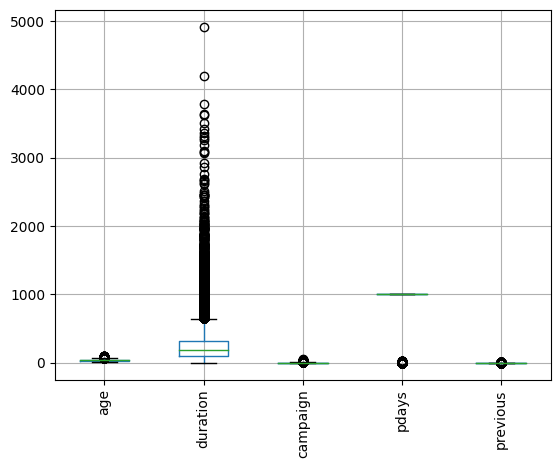

In [16]:
# create boxplot
df.boxplot()
# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

There seems to be a lot of oytlier data with the duration column.

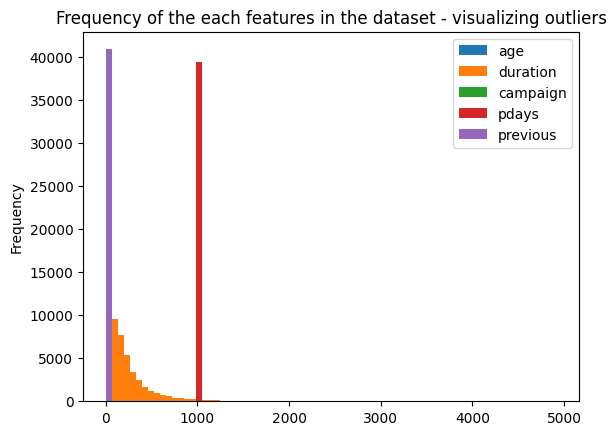

In [17]:
# creating another histogram with more bins
df.plot.hist(bins=75, title='Frequency of the each features in the dataset - visualizing outliers');


In [18]:
df['previous'].value_counts() # check unique values for previous

previous
0    35257
1     4536
2      744
3      214
4       70
5       18
6        5
7        1
Name: count, dtype: int64

### Data Visualization

Visualizing the correlation matrix to see the correlations of features.

               age  duration  campaign     pdays  previous
age       1.000000  0.000831  0.003924 -0.033569  0.024023
duration  0.000831  1.000000 -0.071583 -0.047358  0.020308
campaign  0.003924 -0.071583  1.000000  0.052492 -0.078990
pdays    -0.033569 -0.047358  0.052492  1.000000 -0.586011
previous  0.024023  0.020308 -0.078990 -0.586011  1.000000


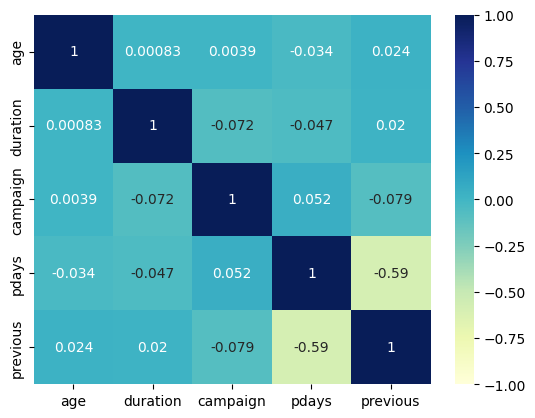

In [19]:
pd.set_option('display.width', 400)
import seaborn as sns

non_numeric_cols = df.select_dtypes(exclude=['object']).columns
# Correlation Matrix formation
corr_matrix = df[non_numeric_cols].corr()
corr_matrix.fillna(0, inplace=True) #imputing the Nan with 0
print(corr_matrix)

#Using heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1);

We see a negative correlation between `previous` and `pdays`; `previous` and `campaign`; `duration` and `pdays`; `age` and `pdays`. We do not see any high correlations between the features in the dataset.

In [20]:
df['target'].value_counts() # check unique values for target

target
no     36243
yes     4602
Name: count, dtype: int64

In [21]:
df['target'].value_counts().keys() # converting the target variable into numeric
target = {'yes':1,'no': 0}
df['target']=df['target'].map(target)
df.sample()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,target
2748,41,admin.,married,high.school,no,yes,no,telephone,may,wed,300,1,999,0,nonexistent,0


In [22]:
!pip install plotly --upgrade

In [25]:
# Visualizing the % of target values using pie chart
# Create the pie chart
labels = df['target'].value_counts().keys()
values = df['target'].value_counts().values
fig = px.pie(df, values=values, names=labels,
             title='Target value distribution',
             color_discrete_sequence=['#4c78a8', '#72b7b2']
             )

# Display the pie chart
# fig.show()
# Set title/axis labels
import plotly
plotly.io.write_html(fig, 'plot.html')
fig.update_layout(
                  title_x=0,
                  yaxis_title='Count ',
                  width=1200, height=550
                  )

fig.show();

There are `88.7%` target value as `0` and rest `11.3%` has a target value of `1` means subscribed for a term deposit.

Now, let's use a countplot to visualize and analyze the data.

Number of object variables in the dataset is  10


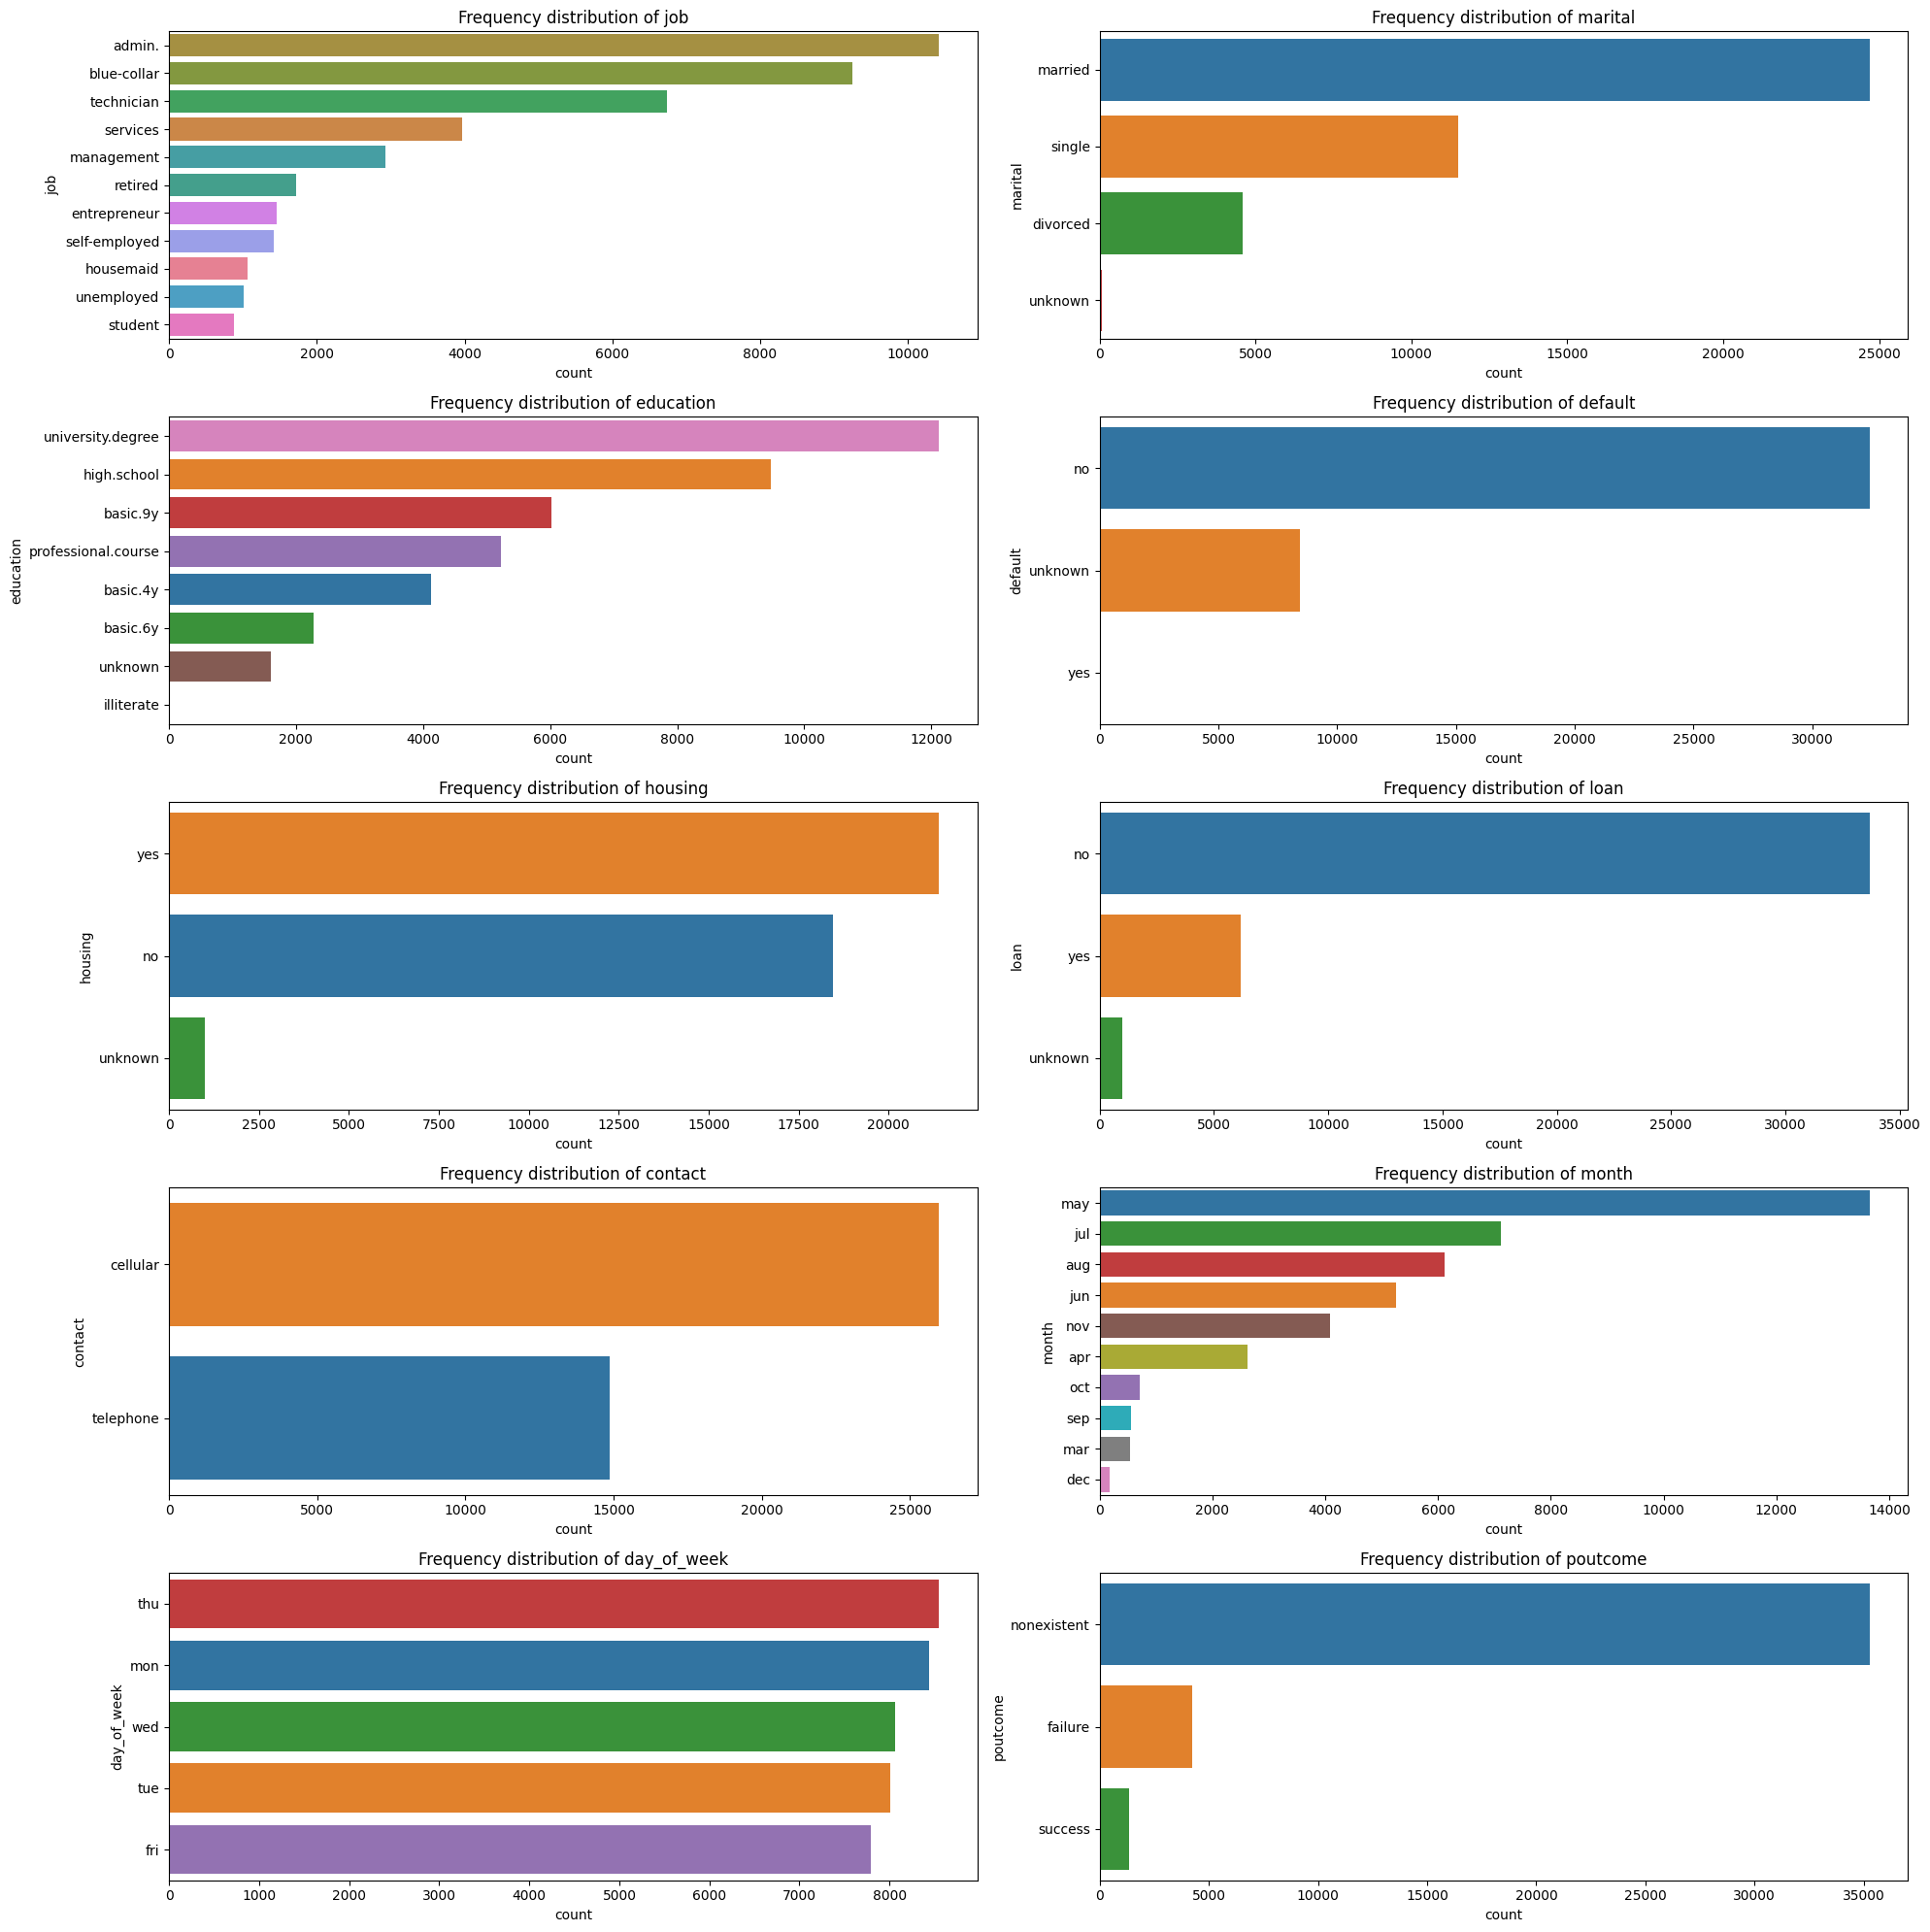

In [140]:
fig, axes = plt.subplots(5, 2, figsize=(20,20)) # Since, there are almost 17 columns, going with 9, 2 subplot
axes = axes.flatten()
print(f'Number of object variables in the dataset is ' , len(df.select_dtypes('object').columns))

for ax, col in zip(axes, df.select_dtypes('object').columns): #data is categorical
    sns.countplot(y=col, data=df, ax=ax,
                  hue=col, order=df[col].value_counts().index
                  ).set(title='Frequency distribution of {}'.format(col)
                  )

plt.tight_layout()
plt.show();

* There are above 10000+ `admins` in the dataset, followed by`blue-collar` and then `technicians`.
* There are `~25,000` `married` followed by `single` and `divorced`.`12,000` have a `university-degree`, followed by`high-school` and `basic-9y`.
* Majority do not have a credit in default.
* Majority has a housing loan and do not have a personal loan.
* Most of the clients are contacted using `cellular phones` than telephone.
* Majority of the last contacts for the campaigns for the year were made in `May` and then in `July`.
* The last contact for campaigns happens mostly on `Thursdays` and `Mondays`. Fridays are the least campaign days.
* It is also evident that there has not been much previous outreach marketing campaign and whatever happened resulted in failure.

In [141]:
df['age'].describe() # check the age statistics

count    40845.000000
mean        39.979141
std         10.402741
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

The `age` maximum is `98` and minimum is `17`.

In [142]:
df['age'].sort_values().unique() # Finding the unique values of age column

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 91, 92, 94, 95, 98])

In [143]:
is_less_than25 = df.query('age < 25') #age below 25
is_age_25_40 = df.query('age >= 25 and age < 40') # age between 25 and 40
is_age_40_60 = df.query('age >= 40 and age < 60') # age between 40 and 60
is_age_60_90 = df.query('age >= 60 and age <= 90') # age between 60 and 90
is_above_90 = df.query('age > 90')

less_than25 = len(is_less_than25)/len(df)
age_25_40 = len(is_age_25_40)/len(df)
age_40_60 = len(is_age_40_60)/len(df)
age_60_90 = len(is_age_60_90)/len(df)
above_90 = len(is_above_90)/len(df)

print(f'Age - Less than 25     : {less_than25:.2%}')
print(f'Age - between 25 and 40: {age_25_40:.2%}')
print(f'Age - between 40 and 60: {age_40_60:.2%}')
print(f'Age - between 60 and 90: {age_60_90:.2%}')
print(f'Age - above 90         : {above_90:.2%}')



Age - Less than 25     : 2.60%
Age - between 25 and 40: 52.49%
Age - between 40 and 60: 42.06%
Age - between 60 and 90: 2.82%
Age - above 90         : 0.02%


In [144]:
#Histogram to plot Age distribution
df['age_group'] = pd.cut(df['age'],
                         bins=[0, 25, 40, 60, 90, 100],
                         labels=['Less than 25', '25-40', '40-60', '60-90', 'Above 90'])
df['age_group'].value_counts()


age_group
25-40           22003
40-60           16297
Less than 25     1657
60-90             878
Above 90           10
Name: count, dtype: int64

In [145]:
# Plot the histogram

fig = px.histogram(df, x="age_group",
                   color="age_group",
                   title="Age Distribution").update_traces(opacity=0.5)

fig.update_layout(
                  title_x=0,
                  yaxis_title='Count ',
                  width=1200, height=550
                  )

fig.show();

The dataset has majoirty of people in the `25-40` age group - `~22k`, followed by `40-60` age group - `16.29k`.

In [146]:
df = df.drop(columns = 'age_group') # Since, this column was introduced for visualization purpose and the dataset already has age, let's drop this column.
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'target'], dtype='object')

In [147]:
# Plot the histogram for marital status

fig = px.histogram(df, x="marital",
                   color="target",
                   title="Marital Count Distribution").update_traces(opacity=0.5)

fig.update_layout(
                  title_x=0,
                  yaxis_title='Count ',
                  width=1200, height=550
                  )

fig.show();

As we know that the dataset has `~25k` married, out of those `2515` have subscribed for a term deposit and the rest has not subscribed for the term deposit.

Out of the `~10k` singles, `1605` have to a term deposit.

In [31]:
# Plot the histogram for education

edu_deposit_df = df.groupby('education')['target'].count().reset_index() #Isolating the data for the 'eductaion' column
edu_deposit_df.sort_values(by='target', ascending=False, inplace=True)

#Plot the entire data against education column
fig = px.bar(edu_deposit_df,
             x='target', y= 'education',
             color='target', hover_name='education',
             title='Visualizing the data based on education',
             color_continuous_scale=px.colors.diverging.delta
             ).update_traces(opacity=0.6) #px.colors.sequential.xxxxx

#update the layout
fig.update_layout(
                  title_x=0,
                  yaxis_title='Education',
                  xaxis_title='Count ',
                  width=1100, height=550
                  ).update_traces(width=0.8)
fig.show()

We see that the majority people in the dataset has a `university-degree` or a `high-school` degree.


In [32]:
# Plot the histogram for job

edu_deposit_df = df.groupby('job')['target'].count().reset_index() #Isolating the data for the 'job' column
edu_deposit_df.sort_values(by='target', ascending=False, inplace=True)

#Plot the entire data against job column
fig = px.bar(edu_deposit_df,
             y='target', x= 'job',
             color='target', hover_name='job',
             title='Visualizing the data based on job',
             color_continuous_scale=px.colors.diverging.Portland
             ).update_traces(opacity=0.8) #px.colors.sequential.xxxxx

#update the layout
fig.update_layout(
                  title_x=0,
                  xaxis_title='Job',
                  yaxis_title='Count ',
                  width=1100, height=550
                  ).update_traces(width=0.8)
fig.show()

Most of the people in the dataset hold an `admin` or `blue-collar` jobs followed by `technician` or `services` or `management` jobs who pose a bigger chance to subscribe for a term deposit. There are also `unemployed` and `students`, who do not pose any chance to opt for a term deposit.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [33]:
# conda install -c conda-forge feature_engine

In [34]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from feature_engine.imputation import RandomSampleImputer
import category_encoders as ce
from sklearn.naive_bayes import MultinomialNB
import time


In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier as DT, plot_tree, export_text
import time
from sklearn import metrics


In [36]:
# Split the data into X and y
X = df.drop(columns = 'target', axis=1)
y = df['target']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # perform the train_test_split

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

We'll be using the Naive Bayes (NB) as the Baseline Model.

In [38]:
categorical_features = df.select_dtypes(include=['object']).columns # categorical features
numerical_features = df.select_dtypes(exclude=['object']).columns # numerical features
numeric_features = df.select_dtypes(include=['int', 'float'])
numerical_features = list(numeric_features.columns)
numerical_features.remove('target')

numeric_transformer = Pipeline(
    steps=[
        ("scaler", MinMaxScaler())] # MinMaxScaler for numerical
)

categorical_transformer = OneHotEncoder(drop="if_binary") # perform OneHot encoding for the categorical

# preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ])

In [64]:
# Create a pipeline using the preprocessor and the Naive Bayes model
baseline_pipe = Pipeline([
    ('preprocess', preprocessor),
    ("Baseline", MultinomialNB())
    ])
baseline_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], dtype='object'))])),
                ('Baseline', MultinomialNB())])

In [65]:
#fit the model and calulate the time taken
start = time.time()
baseline_pipe.fit(X_train, y_train)
end = time.time()
print(f"Duration for Baseline model (Naive Bayes)      : {round(end-start, 3)} sec")

#calculate the y_pred and inference time
start_time = time.time()
y_pred = baseline_pipe.predict(X_test)
inference_time = time.time() - start_time

#caluclate the metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

# print the results
print(f"Accuracy for Baseline model (Naive Bayes)      : {round(accuracy, 5)}")
print(f"Precision for Baseline model (Naive Bayes)     : {round(precision, 5)}")
print(f"Recall for Baseline model (Naive Bayes)        : {round(recall, 5)}")
print(f"F1-Score for Baseline model (Naive Bayes)      : {round(f1, 5)}")
print(f"Inference time for Baseline model (Naive Bayes): {round(end-inference_time, 5)} sec")

Duration for Baseline model (Naive Bayes)      : 0.101 sec
Accuracy for Baseline model (Naive Bayes)      : 0.89336
Precision for Baseline model (Naive Bayes)     : 0.55032
Recall for Baseline model (Naive Bayes)        : 0.29453
F1-Score for Baseline model (Naive Bayes)      : 0.3837
Inference time for Baseline model (Naive Bayes): 1713331239.76293 sec


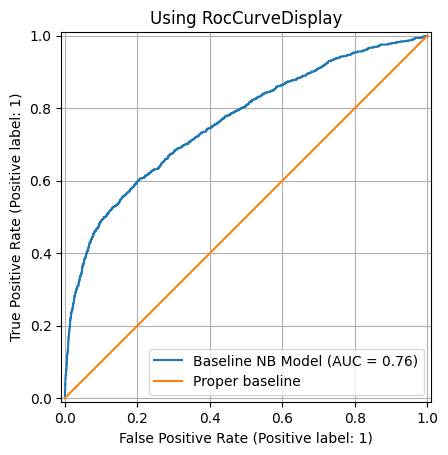

In [66]:
# plot the RocCurve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()
display = RocCurveDisplay.from_estimator(baseline_pipe, X_test, y_test, name='Baseline NB Model', ax=ax)
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), label='Proper baseline')
plt.title('Using RocCurveDisplay')
plt.legend()
plt.grid()
plt.show()

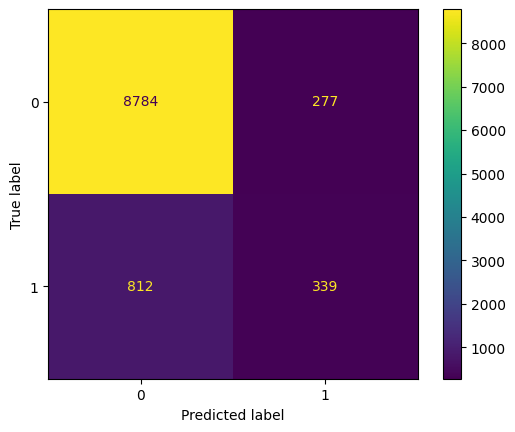

In [67]:
# Plot the ConfusionMatrix
confusion_mat = ConfusionMatrixDisplay.from_predictions(y_test, baseline_pipe.predict(X_test))

The baseline Naive Bayes has correctly predicted `8784` (TP) + `339` (TN) values.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [68]:
# Create a pipeline for LogisticRegression
simple_pipe = Pipeline([
    ('preprocess', preprocessor),
    ("Simple", LogisticRegression())
    ])
simple_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], dtype='object'))])),
                ('Simple', LogisticRegression())])

In [69]:
#fit the model and calulate the time taken
start = time.time()
simple_pipe.fit(X_train, y_train)
end = time.time()
print(f"Duration for Simple model (Logistic Regressions)      : {round(end-start, 3)} sec")

#calculate the y_pred and inference time
start_time = time.time()
y_pred = simple_pipe.predict(X_test)
inference_time = time.time() - start_time

#caluclate the metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

# print the results
print(f"Accuracy for Simple model (Logistic Regression)      : {round(accuracy, 5)}")
print(f"Precision for Simple model (Logistic Regression)     : {round(precision, 5)}")
print(f"Recall for Simple model (Logistic Regression)        : {round(recall, 5)}")
print(f"F1-Score for Simple model (Logistic Regression)      : {round(f1, 5)}")
print(f"Inference time for Simple model (Logistic Regression): {round(end-inference_time, 5)} sec")

Duration for Simple model (Logistic Regressions)      : 0.202 sec
Accuracy for Simple model (Logistic Regression)      : 0.90511
Precision for Simple model (Logistic Regression)     : 0.66426
Recall for Simple model (Logistic Regression)        : 0.31972
F1-Score for Simple model (Logistic Regression)      : 0.43167
Inference time for Simple model (Logistic Regression): 1713331256.4653 sec


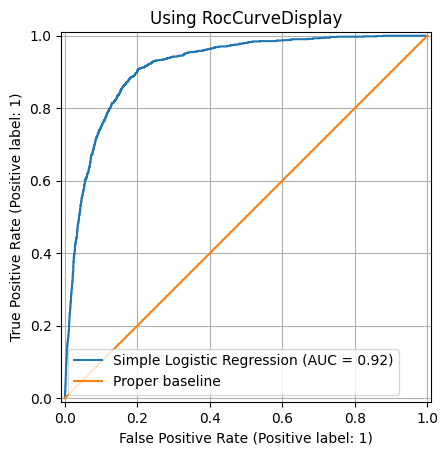

In [70]:
# plot the RocCurve
fig, ax = plt.subplots()
display = RocCurveDisplay.from_estimator(simple_pipe, X_test, y_test, name='Simple Logistic Regression', ax=ax)
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), label='Proper baseline')
plt.title('Using RocCurveDisplay')
plt.legend()
plt.grid()
plt.show()

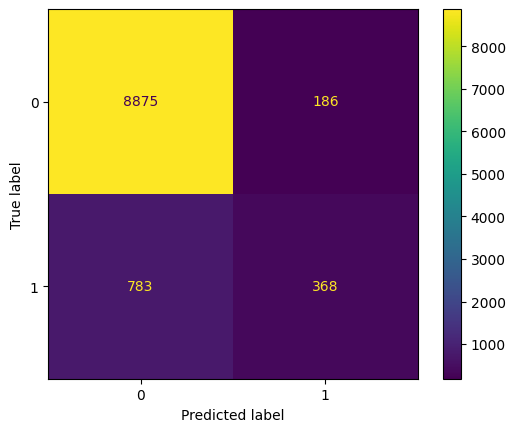

In [46]:
# Plot the ConfusionMatrix
confusion_mat = ConfusionMatrixDisplay.from_predictions(y_test, simple_pipe.predict(X_test))

The baseline Naive Bayes has correctly predicted `8875` (TP) + `368` (TN) values.

### Problem 9: Score the Model

What is the accuracy of your model?

In [47]:
# Categorizing the categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(exclude=['object']).columns

numeric_features = df.select_dtypes(include=['int', 'float'])

numerical_features = list(numeric_features.columns)
# print(f"Numerical features b4: {numerical_features}")

numerical_features.remove('target') #To avoid ---> ValueError: A given column is not a column of the dataframe

print(f"Numerical features: {numerical_features}")

transformer1 = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=10, random_state=42)),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias=False))
])

rnd_imputer = RandomSampleImputer(
    random_state=10,seed='general',
)
cat_features = df.select_dtypes(exclude=['int', 'float'])
categorical_features = list(cat_features.columns)

ordinal_features = ['month', 'day_of_week']
categorical_features.remove(ordinal_features[0])
categorical_features.remove(ordinal_features[1])

transformer2 = Pipeline(steps=[
    ('imputer', rnd_imputer),
    ('encoder', ce.JamesSteinEncoder(return_df=False))
])

# Classify the ordinal featues for month and day_of_week
month_category = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_of_week_category = ['mon', 'tue', 'wed', 'thu', 'fri']

ordinal_encoder = OrdinalEncoder(categories=[month_category, day_of_week_category])

transformer3 = Pipeline(steps=[
    ('imputer', rnd_imputer),
    ('encoder', ordinal_encoder)
])

# usiing OneHotEncoding for 'education', 'poutcome', 'contact'
ohe_features = ['education', 'poutcome', 'contact']
categorical_features.remove(ohe_features[0])
categorical_features.remove(ohe_features[1])
categorical_features.remove(ohe_features[2])
ohe_encoder = OneHotEncoder(handle_unknown='ignore')

transformer4 = Pipeline(steps=[
    ('imputer', rnd_imputer),
    ('encoder', ohe_encoder)
])

column_trans = ColumnTransformer(
    transformers=[
        ('numeric', transformer1, numerical_features),
        ('categorical', transformer2, categorical_features),
        ('ordinal', transformer3, ordinal_features),
        ('ohe', transformer4, ohe_features)
        ], remainder='passthrough')

print(f"Catergorical features: {categorical_features}")
print(f"Ordinal features: {ordinal_features}")
print(f"Ohe features: {ohe_features}\n")

column_trans

Numerical features: ['age', 'duration', 'campaign', 'pdays', 'previous']
Catergorical features: ['job', 'marital', 'default', 'housing', 'loan']
Ordinal features: ['month', 'day_of_week']
Ohe features: ['education', 'poutcome', 'contact']



ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer(random_state=42)),
                                                 ('scaler', StandardScaler()),
                                                 ('poly',
                                                  PolynomialFeatures(degree=1,
                                                                     include_bias=False))]),
                                 ['age', 'duration', 'campaign', 'pdays',
                                  'previous']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  RandomSampleImputer(random_state=10)),
                                                 ('en...
                                                  RandomSampleImputer(random_state=10)),
                                                 ('encoder',
                                                  OrdinalEncoder(categories=[['mar',
                                                                              'apr',
                                                                              'may',
                                                                              'jun',
                                                                              'jul',
                                                                              'aug',
                                                                              'sep',
                                                                              'oct',
                                                                              'nov',
                                                                              'dec'],
                                                                             ['mon',
                                                                              'tue',
                                                                              'wed',
                                                                              'thu',
                                                                              'fri']]))]),
                                 ['month', 'day_of_week']),
                                ('ohe',
                                 Pipeline(steps=[('imputer',
                                                  RandomSampleImputer(random_state=10)),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['education', 'poutcome', 'contact'])])

In [48]:
# print the results
results = {
    'Model': [],
    'Train Time': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Inference Time': []
}

In [49]:
# We're considering to run the models - KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression, SVM along with pipelines
models = {
    'KNN': Pipeline([('preprocess', column_trans), ('classifier', KNeighborsClassifier())]),
    'Decision Trees': Pipeline([('preprocess', column_trans), ('classifier', DecisionTreeClassifier())]),
    'Logistic Regression': Pipeline([('preprocess', column_trans), ('classifier', LogisticRegression())]),
    'SVM': Pipeline([('preprocess', column_trans), ('classifier', SVC())])
}

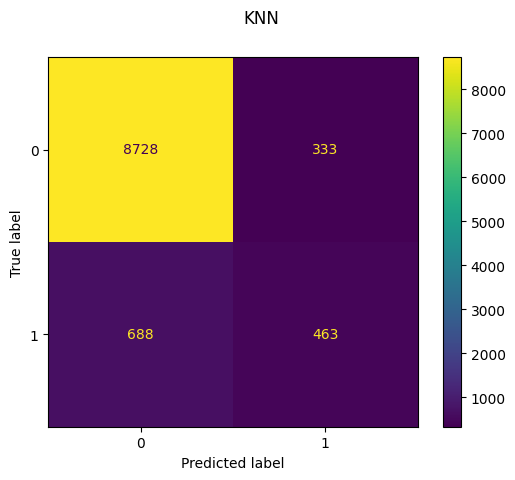

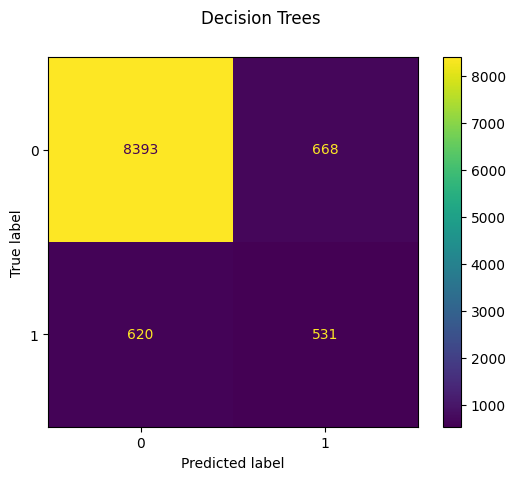

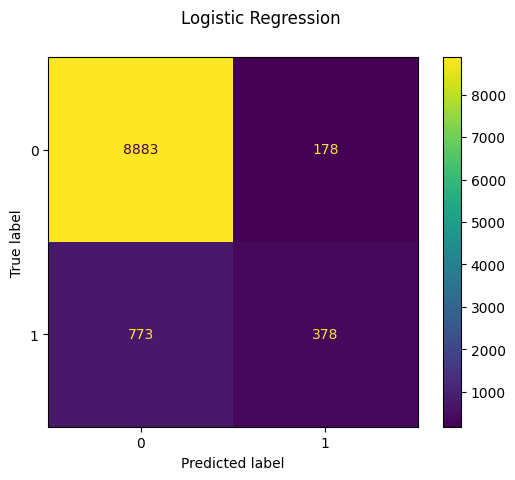

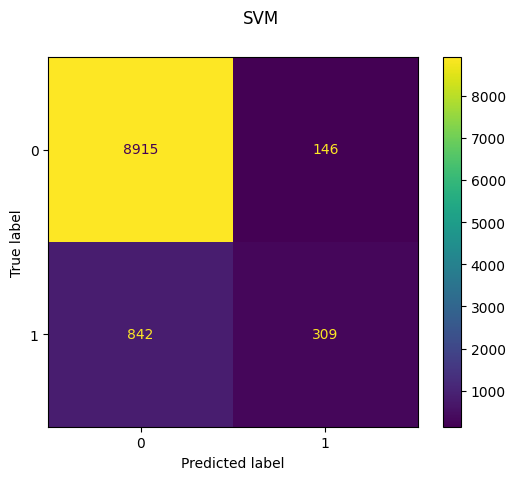

In [50]:
#fit the model and calulate the time taken
for model_name, model in models.items():
    importances = []
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    #calculate the y_pred and inference time
    start_time = time.time()
    y_pred = model.predict(X_test)
    inference_time = time.time() - start_time

    #caluclate the metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # plot confusion matrix
    confusion_mat = ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
    confusion_mat.figure_.suptitle(model_name)

    # append results
    results['Model'].append(model_name)
    results['Train Time'].append(train_time)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    results['Inference Time'].append(inference_time)

Evidently from the Confusion matrix, that the false positives or false negatives are not in significant number and that the majority data are classified as TN and TP.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [51]:
# display the model's train time, accuracy, precision, F1-score and Inference time
pd.DataFrame(results)

,Model,Train Time,Accuracy,Precision,Recall,F1-Score,Inference Time
0,KNN,0.260429,0.900020,0.581658,0.402259,0.475603,0.241265
1,Decision Trees,0.406031,0.873874,0.442869,0.461338,0.451915,0.041472
2,Logistic Regression,0.457528,0.906874,0.679856,0.328410,0.442882,0.045012
3,SVM,12.696471,0.903251,0.679121,0.268462,0.384807,3.676201


When the problem statement involves predicting whether a client will subscribe to a term deposit based on data from direct marketing campaigns, several factors need consideration. In particular, the balance between false positives and false negatives is crucial.

*False Positives*: Predicting a client will subscribe to a term deposit when they actually won't can be costly in terms of resources spent on marketing efforts that don't result in subscriptions.

*False Negatives*: Failing to predict that a client will subscribe when they actually will can also be costly, as it represents a missed opportunity to secure a subscription.

Given these considerations, **Precision** would be a crucial metric to prioritize in this scenario. *Precision focuses on minimizing false positives, ensuring that when the model predicts a client will subscribe*, it's highly likely to be correct. A high precision score indicates that the marketing resources are efficiently allocated to clients who are more likely to subscribe, minimizing wasted efforts.

`Logistic Regression` has the best accuracy of `0.900020` and Precision of `0.679856`, it has a train time of `0.457528` seconds and inference time of `0.045012` seconds.

`SVM` has the next best accuracy and precision of `0.906874` and	`0.679856` but it took a lot of time for execution both train and inference time, so this is not a recommended model to go about.

`KNN` seems to have an accuracy of `0.900020`, Precision of `0.581658` and lesser train time of `0.260429` sec and `0.241265` sec inference time.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

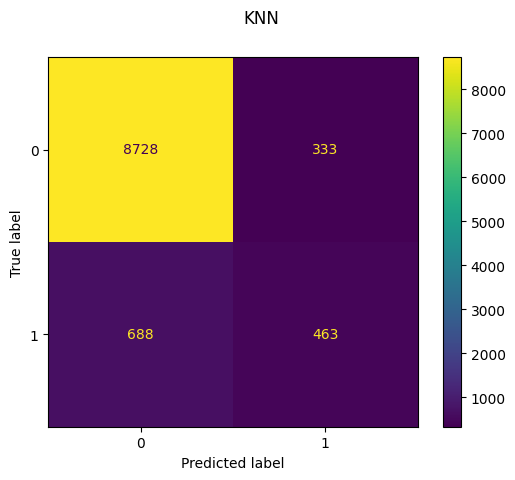

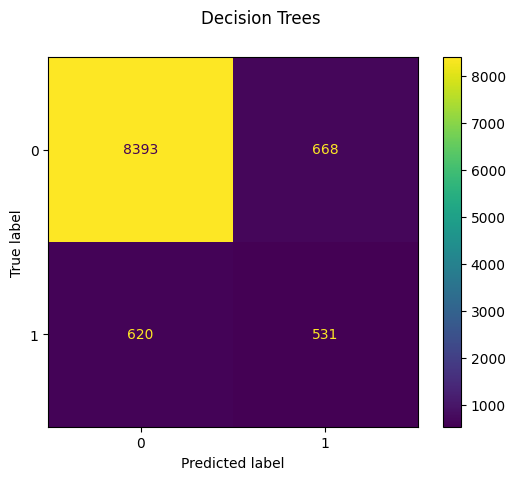

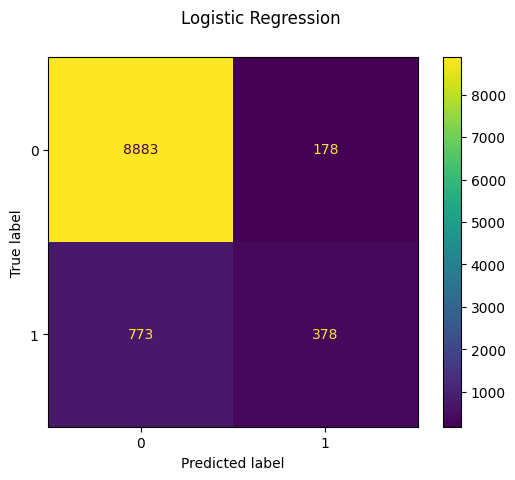

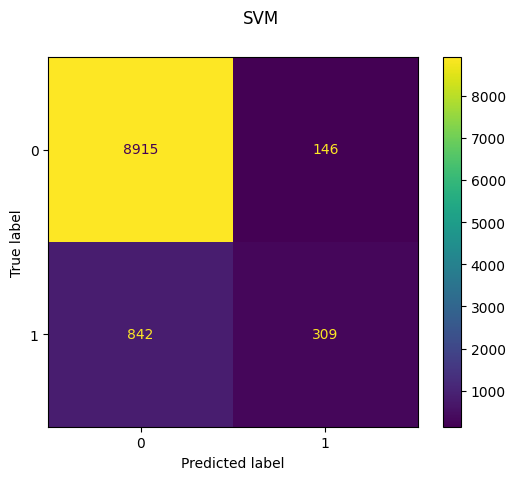

In [52]:
# =====Caution - This block of code takes a lot of time for execution and was successfully executed using Colab TPU.
# Define parameter grids for each model
param_grids = {
    'KNN': {'classifier__n_neighbors': [3, 5, 7]},
    'Decision Trees': {'classifier__max_depth': [None, 10, 20]},
    'Logistic Regression': {'classifier__C': [0.1, 1, 10], 'classifier__penalty': ['l1', 'l2']},
    'SVM': {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
}

results = {
    'Model': [],
    'Train Time': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Inference Time': []
}

# Perform GridSearchCV for each model
for model_name, model in models.items():
    param_grid = param_grids.get(model_name, {})  # Get parameter grid for the model
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Calculate the train time
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Get the best model
    best_model = grid_search.best_estimator_

    # calculate the y_pred and inference time
    start_time = time.time()
    y_pred = best_model.predict(X_test)
    inference_time = time.time() - start_time

    # calculate metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # plot confusion matrix
    confusion_mat = ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
    confusion_mat.figure_.suptitle(model_name)

    # Append results
    results['Model'].append(model_name)
    results['Train Time'].append(train_time)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    results['Inference Time'].append(inference_time)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

It is evident from the Confusion matrix, that the false positives or false negatives are not in significant number and that the majority data are classified as TN and TP.

In [53]:
# print the results dataframe
results_df

,Model,Train Time,Accuracy,Precision,Recall,F1-Score,Inference Time
0,KNN,9.596891,0.902076,0.603567,0.382276,0.468085,0.151476
1,Decision Trees,4.493332,0.906189,0.625488,0.417897,0.501042,0.042455
2,Logistic Regression,6.820447,0.906874,0.679856,0.328410,0.442882,0.044733
3,SVM,1544.274031,0.903937,0.682403,0.276281,0.393321,3.659533


With improving the parameters, for `Logistic Regression` we see that the accuracy has increased slightly to `0.906874` but the Precision remains the same.

`KNN` seems to have a *slight increase* in accuracy to `0.902076`, and Precision to `0.603567`, but the train time and inference time are higher than the logistic regression execution times.

**`SVM` is the best model with an accuracy of `0.903937` and a Precision of `0.682403`** (has incredibly higher execution time for both train and inference time though).

**Note**: These parameters needs to be refined to get better results, but execution time also needs to be considered.

In [54]:
# perform feature importance
from sklearn.inspection import permutation_importance
best_model = grid_search.best_estimator_
r = permutation_importance(best_model, X, y,
                            n_repeats=10,
                            random_state=0)
parameters = {'feature': [], 'importance_mean': [], 'importance_std': []}
for i in r.importances_mean.argsort()[::-1]:
    print(f"{X.columns.tolist()[i]:<8} "
          f"{r.importances_mean[i]:.3f}"
          f" +/- {r.importances_std[i]:.3f}")
    parameters['feature'].append(X.columns.tolist()[i])
    parameters['importance_mean'].append(r.importances_mean[i])
    parameters['importance_std'].append(r.importances_std[i])

importance_df = pd.DataFrame(parameters)
importance_df.head(10) # display only top 10 important features

duration 0.027 +/- 0.001
pdays    0.019 +/- 0.000
previous 0.003 +/- 0.000
month    0.003 +/- 0.000
education 0.003 +/- 0.000
age      0.002 +/- 0.000
day_of_week 0.002 +/- 0.000
contact  0.002 +/- 0.000
campaign 0.002 +/- 0.000
poutcome 0.001 +/- 0.000
job      0.000 +/- 0.000
default  0.000 +/- 0.000
loan     0.000 +/- 0.000
housing  0.000 +/- 0.000
marital  -0.000 +/- 0.000


,feature,importance_mean,importance_std
0,duration,0.027391,0.000903
1,pdays,0.018891,0.000409
2,previous,0.003459,0.000313
3,month,0.003229,0.000423
4,education,0.002708,0.000368
5,age,0.002465,0.000172
6,day_of_week,0.002184,0.000262
7,contact,0.001699,0.000102
8,campaign,0.001564,0.000242
9,poutcome,0.001114,0.000166


From the feature importance, we see that **Call duration is the most relevant feature**, followed by **pdays, previous and month**.

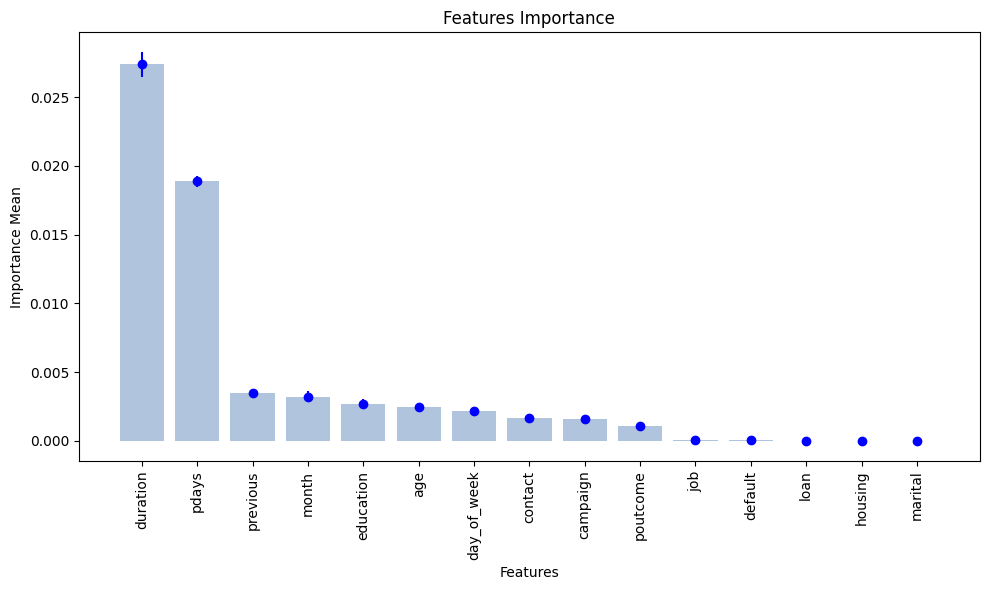

In [106]:
# Plot the feature importance as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(importance_df["feature"], importance_df["importance_mean"], color='lightsteelblue')
plt.errorbar(importance_df["feature"], importance_df["importance_mean"], yerr=importance_df["importance_std"], fmt='o', color='blue')
plt.xlabel("Features")
plt.ylabel("Importance Mean")
plt.title("Features Importance")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In the beginning we started described a paper on CRISP-DM-BANK.pdf. According to that the best predictive model is **SVM**, which provides a high quality **AUC value, higher than 0.9**.

![](https://imgur.com/HRjM226.png)

**Call duration is the most relevant feature**, meaning that longer calls tend increase successes. Secondly, **the month of contact**. Further analysis can show (Figure 6) that success is most likely to occur in the last month of each trimester (March, June, September and December). Such knowledge can be used to shift campaigns to occur in those months.

The results from our modeling aligns well with the conclusions from the paper.



##### Questions